In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
experiments_without = pickle.load(open("final_results/experiments_all_without_new_max4.p", "rb"))
outcomes_without = pickle.load(open("final_results/outcomes_all_without_new_max4.p", "rb"))
df_all_without = pd.merge(experiments_without,pd.DataFrame(outcomes_without), left_index=True, right_index=True)

In [3]:
df_all_without['no_sited'] = df_all_without.apply(lambda x: sum(x.optimal_facilities.values()), axis=1)

In [4]:
# df_all ['% assigned flow of max'] = (df_all['total_flow']*df_all['fraction_captured_total'])/(df_all['no_sited_nodes'])
def determine_no_c_and_m(x):
    if x.scenario_var==0:
        c=2000
        m=5
    elif x.scenario_var==1:
        c=3333
        m=3
    else:
        c=10000
        m=1
    return tuple([c, m])

In [5]:
df_all_without['c'] = df_all_without.apply(lambda x: determine_no_c_and_m(x)[0], axis=1)
df_all_without['m'] = df_all_without.apply(lambda x: determine_no_c_and_m(x)[1], axis=1)

In [6]:
df_all_without['r']=df_all_without['r']/1000

## Reformatting
Now we want to establish a function, to find min number of stations to achieve max fraction captured total in all 9 scenarios

In [7]:
df1 = df_all_without.loc[(df_all_without.c==2000)&(df_all_without.m==5)&(df_all_without.r==150)]

In [8]:
def remove_redundant_rows(row, df):
    relevant_rows = df.loc[(df.c==row.c)&(df.m==row.m)&(df.r==row.r)]
    # are there any runs with same or equal fraction captured and with fewer stations?
    min_stations = relevant_rows.loc[round(relevant_rows.fraction_captured_total, 4)>=round(row.fraction_captured_total, 4)].p.min()
    if row.p==min_stations:
        return row['fraction_captured_total']
    else:
        return 0


In [9]:
df_all_without['fraction_captured_total'] = df_all_without.apply(lambda x: remove_redundant_rows(x, df_all_without),axis=1)

In [10]:
df_all_without = df_all_without.loc[df_all_without['fraction_captured_total']!=0]

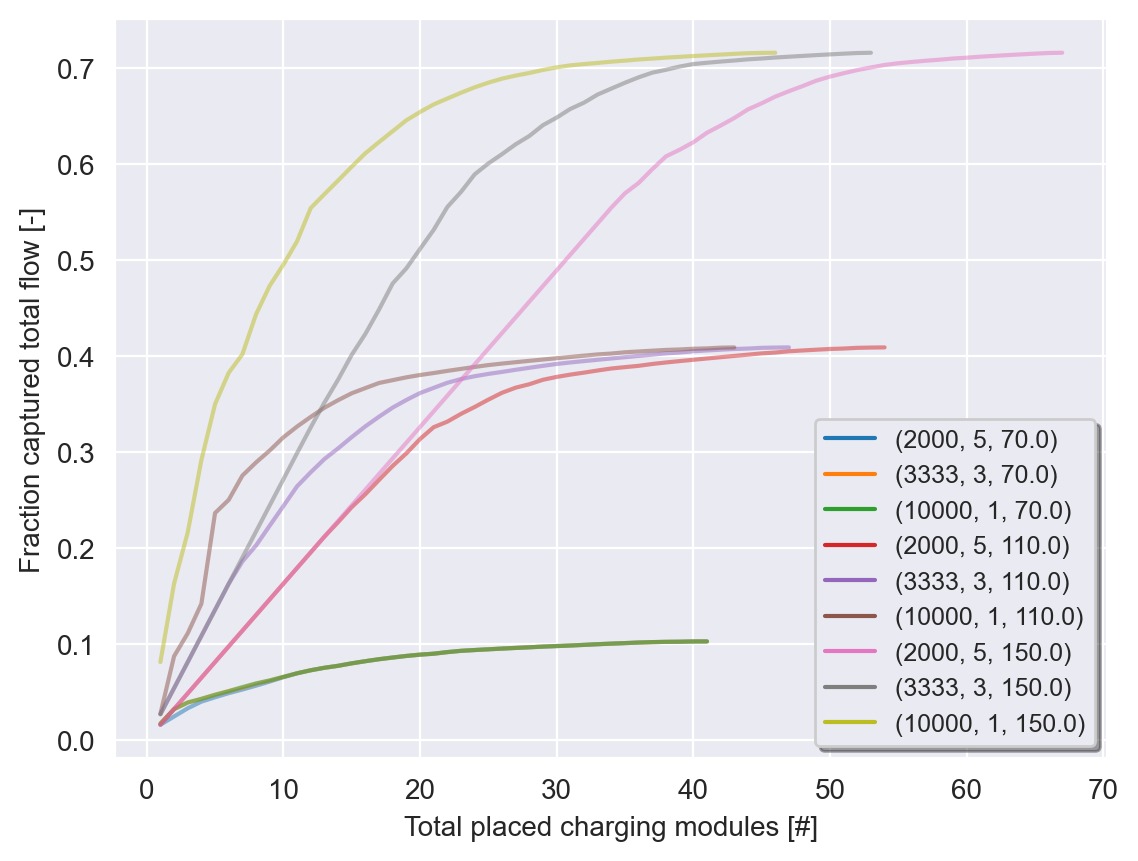

In [11]:
fig, ax = plt.subplots(dpi=200)
sns.lineplot(x='p', y='fraction_captured_total', hue=df_all_without[['c', 'm', 'r']].apply(tuple, axis=1), data=df_all_without, alpha=0.5)
ax.legend(fontsize=9, fancybox=True, shadow=True)
plt.xlabel('Total placed charging modules [#]')
plt.ylabel("Fraction captured total flow [-]")
plt.show()

# What are the outcomes with the most effective stations for each scenario?

In [12]:
df_without_best = pd.DataFrame()
for r in [70, 110, 150]:
    for m,c in [(1, 10000), (3, 3333), (5,2000)]:
        relevant_rows = df_all_without.loc[(df_all_without.c==c)&(df_all_without.m==m)&(df_all_without.r==r)]
        relevant_rows = relevant_rows.loc[relevant_rows.p==relevant_rows.p.max()]
        df_without_best = pd.concat([df_without_best, relevant_rows], ignore_index=True)

In [13]:
df_without_best

,r,scenario_var,p,scenario,policy,model,total_flow,fraction_captured_total,serviceable_fraction,served_fraction,optimal_facilities,non_zero_flows,add_nodes_used,no_sited,c,m
0,70.0,2,41,102,40,frlm,2.941841e+06,0.103065,0.103069,0.999965,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,41.0,10000,1
1,70.0,1,41,101,40,frlm,2.941841e+06,0.103065,0.103069,0.999965,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,41.0,3333,3
2,70.0,0,41,100,40,frlm,2.941841e+06,0.103065,0.103069,0.999965,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,41.0,2000,5
3,110.0,2,43,105,42,frlm,2.941841e+06,0.409263,0.409292,0.999928,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,43.0,10000,1
4,110.0,1,47,104,46,frlm,2.941841e+06,0.409263,0.409292,0.999928,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,47.0,3333,3
5,110.0,0,54,103,53,frlm,2.941841e+06,0.409263,0.409292,0.999928,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,54.0,2000,5
6,150.0,2,46,108,45,frlm,2.941841e+06,0.716140,0.746216,0.959696,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,46.0,10000,1
7,150.0,1,53,107,52,frlm,2.941841e+06,0.716106,0.746216,0.959651,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,53.0,3333,3
8,150.0,0,67,106,66,frlm,2.941841e+06,0.716131,0.746216,0.959684,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,67.0,2000,5


In [14]:
df_without_best_copy=df_without_best.copy()
df_without_best_copy.c = df_without_best_copy.c.apply(lambda x: "5x2 MW" if x==2000 else x)
df_without_best_copy.c = df_without_best_copy.c.apply(lambda x: "3x3.3 MW" if x==3333 else x)
df_without_best_copy.c = df_without_best_copy.c.apply(lambda x: "1x10 MW" if x==10000 else x)

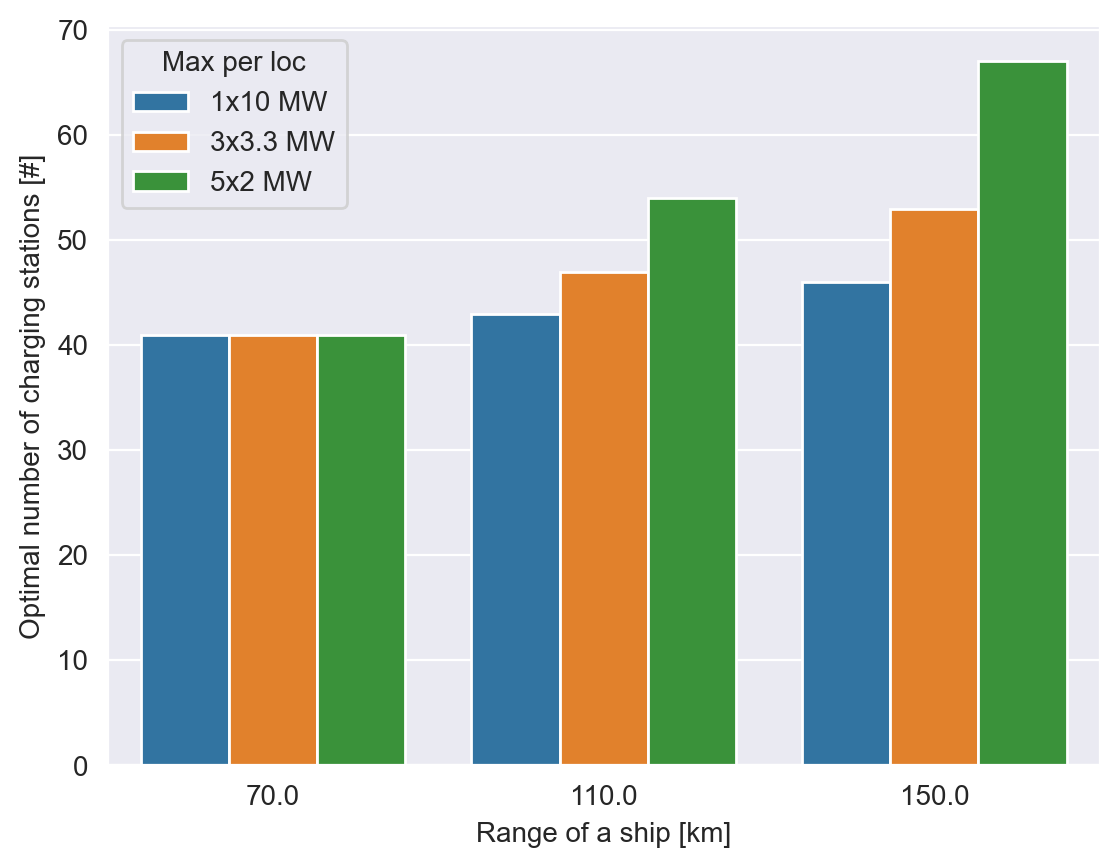

In [15]:
fig, ax = plt.subplots(dpi=200)
sns.barplot(x='r', y='p', data=df_without_best_copy, hue='c')
plt.xlabel('Range of a ship [km]')
plt.ylabel('Optimal number of charging stations [#]')
ax.legend(title="Max per loc")

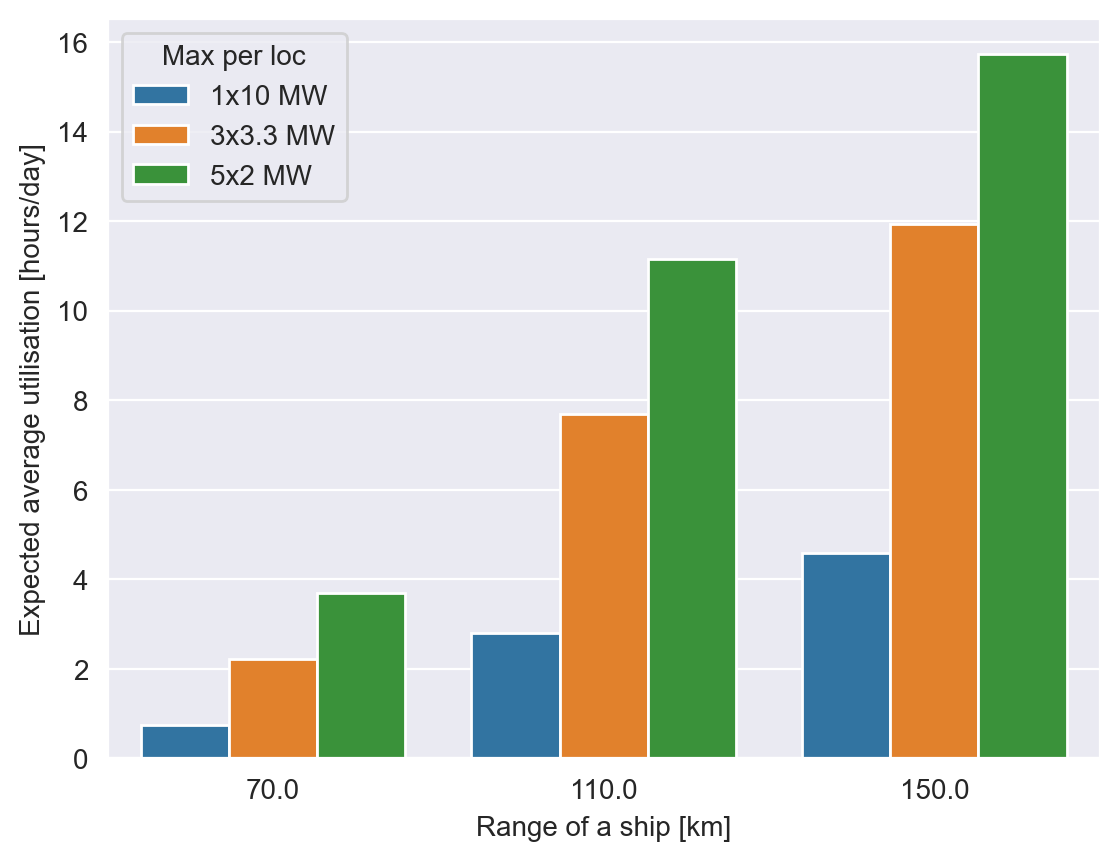

In [16]:
fig, ax = plt.subplots(dpi=200)
sns.barplot(x='r', y=(2941841.1*df_without_best_copy['fraction_captured_total'])/(df_without_best_copy['p']*df_without_best['c']), data=df_without_best_copy, hue='c')
plt.xlabel('Range of a ship [km]')
plt.ylabel('Expected average utilisation [hours/day]')
plt.legend(title='Max per loc')

In [17]:
pickle.dump(df_without_best, open('final_results/df_all_without_clean.p', 'wb'))

## With additional nodes

In [18]:
experiments_with = pickle.load(open("final_results/experiments_all_with_new_max4.p", "rb"))
outcomes_with = pickle.load(open("final_results/outcomes_all_with_new_max4.p", "rb"))
df_all_with = pd.merge(experiments_with,pd.DataFrame(outcomes_with), left_index=True, right_index=True)
df_all_with['c'] = df_all_with.apply(lambda x: determine_no_c_and_m(x)[0], axis=1)
df_all_with['m'] = df_all_with.apply(lambda x: determine_no_c_and_m(x)[1], axis=1)

## Reformatting

In [19]:
df_all_with['no_sited'] = df_all_with.apply(lambda x: sum(x.optimal_facilities.values()), axis=1)
df_all_with['r']=df_all_with['r']/1000

In [20]:
df_all_with['fraction_captured_total'] = df_all_with.apply(lambda x: remove_redundant_rows(x, df_all_with),
                                                                 axis=1)
df_all_with = df_all_with.loc[df_all_with['fraction_captured_total'] != 0]

## Results with additional nodes

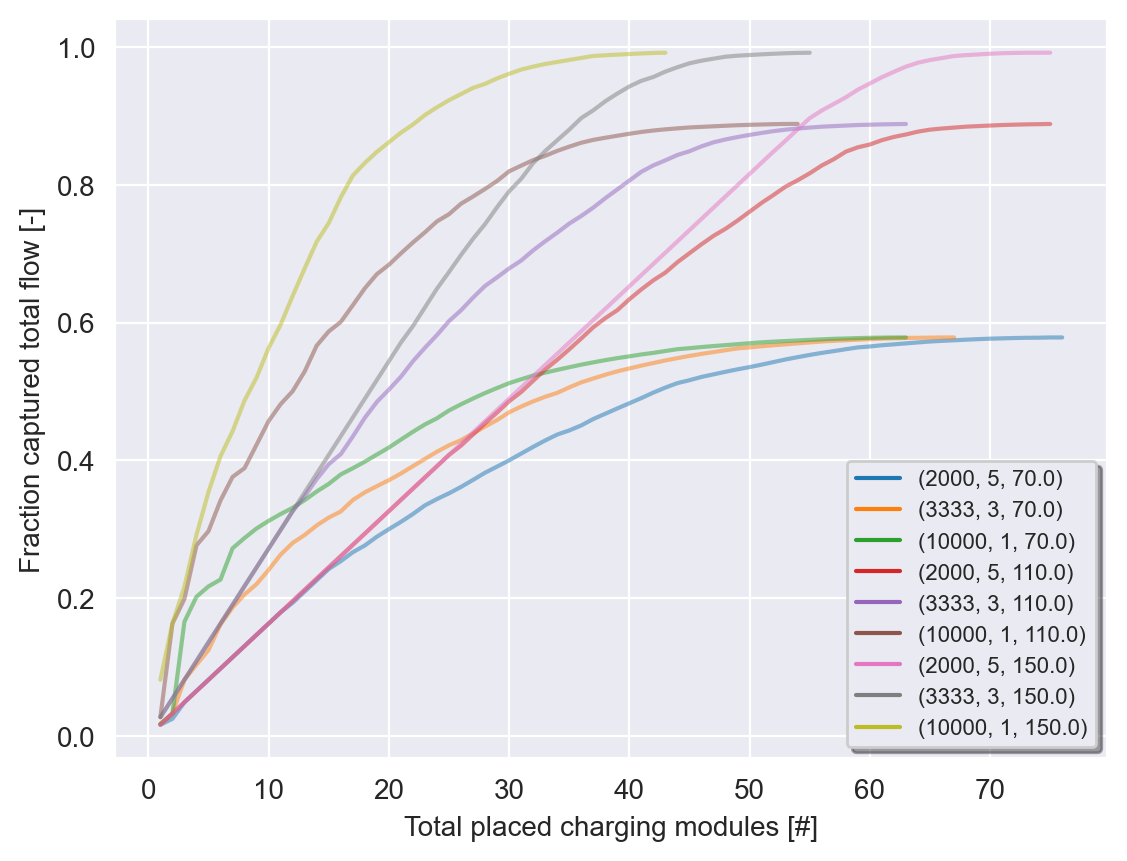

In [21]:
fig, ax = plt.subplots(dpi=200)
sns.lineplot(x='p', y='fraction_captured_total', hue=df_all_with[['c', 'm', 'r']].apply(tuple, axis=1), data=df_all_with.loc[df_all_with.served_fraction<1], alpha=0.5)
ax.legend(fontsize=8, fancybox=True, shadow=True)
plt.xlabel('Total placed charging modules [#]')
plt.ylabel("Fraction captured total flow [-]")
plt.show()

In [22]:
df_all_with.served_fraction.round(4)

0      0.0282
1      0.0303
2      0.0303
3      0.0184
4      0.0306
        ...  
666    0.9999
669    0.9998
672    1.0000
675    1.0000
678    1.0000
Name: served_fraction, Length: 572, dtype: float64

In [23]:
df_with_best = pd.DataFrame()
for r in [70, 110, 150]:
    for m, c in [(1, 10000), (3, 3333), (5, 2000)]:
        relevant_rows = df_all_with.loc[(df_all_with.c == c) & (df_all_with.m == m) & (df_all_with.r == r)]
        relevant_rows = relevant_rows.loc[relevant_rows.p == relevant_rows.p.max()]
        df_with_best = pd.concat([df_with_best, relevant_rows], ignore_index=True)

In [24]:
df_with_best

,r,scenario_var,p,scenario,policy,model,total_flow,fraction_captured_total,serviceable_fraction,served_fraction,optimal_facilities,non_zero_flows,add_nodes_used,c,m,no_sited
0,70.0,2,63,102,62,frlm,2.941841e+06,0.578451,0.578467,0.999974,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 1....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",29.0,10000,1,63.0
1,70.0,1,67,101,66,frlm,2.941841e+06,0.578451,0.578467,0.999974,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 1....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",29.0,3333,3,67.0
2,70.0,0,76,100,75,frlm,2.941841e+06,0.578451,0.578467,0.999974,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 1....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",33.0,2000,5,76.0
3,110.0,2,54,105,53,frlm,2.941841e+06,0.888475,0.888502,0.999970,"{'101': 0.0, '102': 0.0, '103': 1.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",21.0,10000,1,54.0
4,110.0,1,64,104,63,frlm,2.941841e+06,0.888502,0.888502,1.000000,"{'101': 1.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",23.0,3333,3,64.0
5,110.0,0,76,103,75,frlm,2.941841e+06,0.888502,0.888502,1.000000,"{'101': 1.0, '102': 1.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",25.0,2000,5,76.0
6,150.0,2,45,108,44,frlm,2.941841e+06,0.991757,0.991757,1.000000,"{'101': 1.0, '102': 1.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",23.0,10000,1,45.0
7,150.0,1,55,107,54,frlm,2.941841e+06,0.991755,0.991757,0.999998,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",21.0,3333,3,55.0
8,150.0,0,75,106,74,frlm,2.941841e+06,0.991755,0.991757,0.999998,"{'101': 1.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",24.0,2000,5,75.0


In [25]:
pickle.dump(df_with_best, open('data/data_9_scenarios.p', 'wb'))

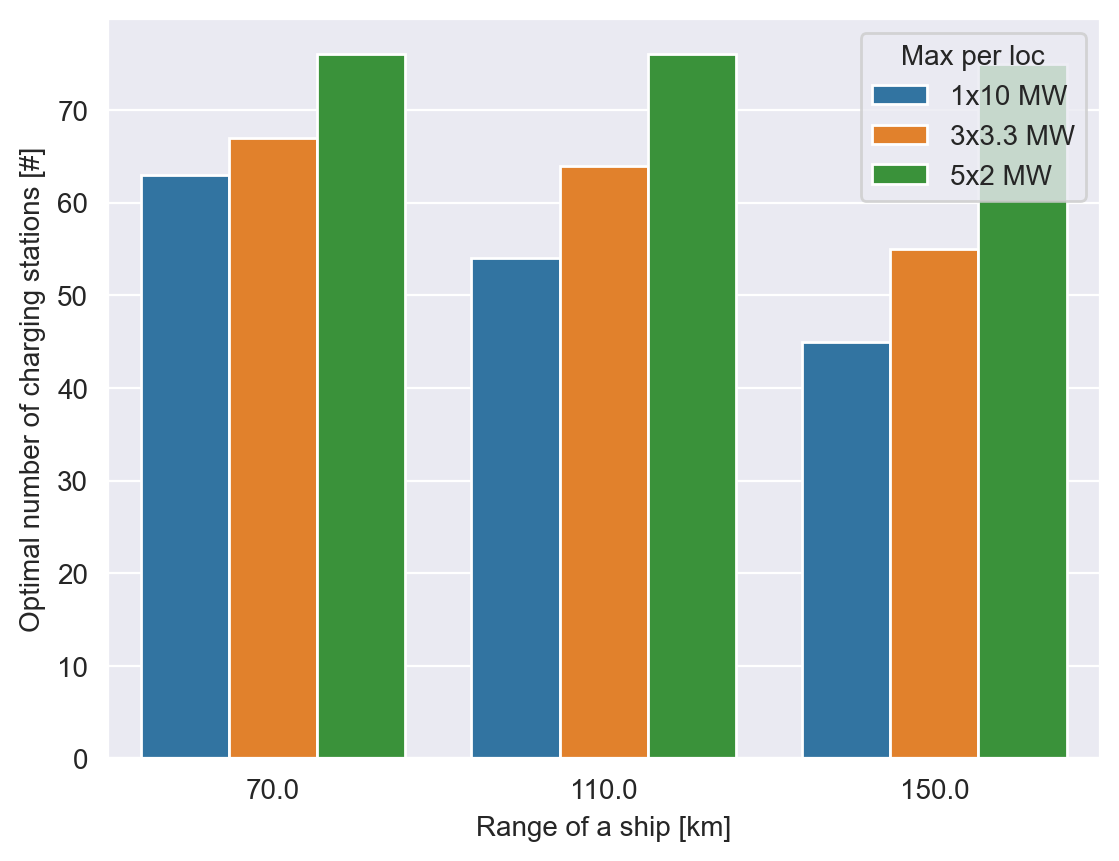

In [26]:
df_with_best_copy = df_with_best.copy()
df_with_best_copy.c = df_with_best_copy.c.apply(lambda x: "5x2 MW" if x == 2000 else x)
df_with_best_copy.c = df_with_best_copy.c.apply(lambda x: "3x3.3 MW" if x == 3333 else x)
df_with_best_copy.c = df_with_best_copy.c.apply(lambda x: "1x10 MW" if x == 10000 else x)

fig, ax = plt.subplots(dpi=200)
sns.barplot(x='r', y='p', data=df_with_best_copy, hue='c')
plt.xlabel('Range of a ship [km]')
plt.ylabel('Optimal number of charging stations [#]')
ax.legend(title="Max per loc")

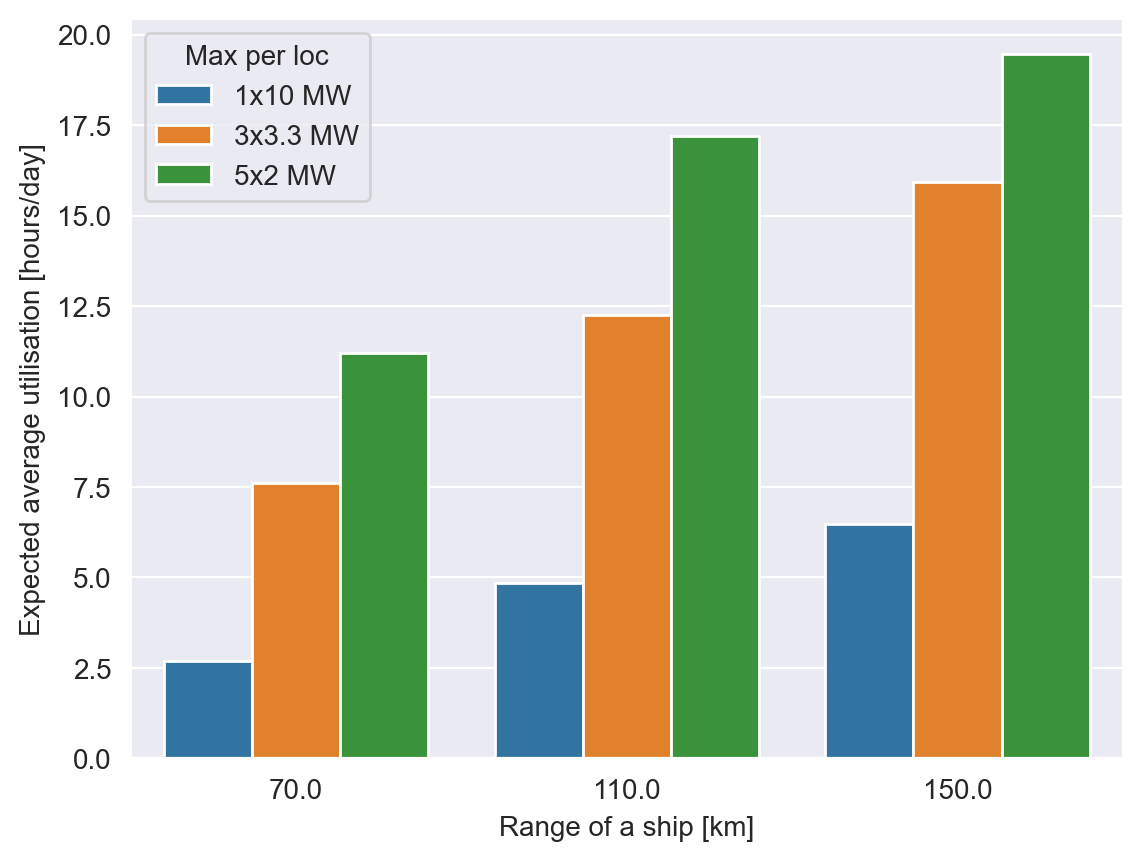

In [27]:
fig, ax = plt.subplots(dpi=200)
sns.barplot(x='r', y=(2941841.1*df_with_best_copy['fraction_captured_total'])/(df_with_best_copy['p']*df_with_best['c']), data=df_with_best_copy, hue='c')
plt.xlabel('Range of a ship [km]')
plt.ylabel('Expected average utilisation [hours/day]')
plt.legend(title='Max per loc')

In [28]:
pickle.dump(df_with_best, open('final_results/df_all_with_clean.p', 'wb'))

In [29]:
df_all_with.p.sum()

18957

In [30]:
df_all_without.p.sum()

10932

In [31]:
4495/10932

0.41117819246249543